In [1]:
import pandas as pd
import random
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
import importlib
import plottingFunctions

In [2]:
datetime_intervals = pd.DataFrame([
    (pd.to_datetime('2023-01-15'), pd.to_datetime('2023-01-20')),
    (pd.to_datetime('2023-01-10 13:13'), pd.to_datetime('2023-06-13'))
],columns=['begin','end'])


datetime_intervals_2 = pd.DataFrame([
    (pd.to_datetime('2023-01-22'), pd.to_datetime('2023-01-24')),    
    (pd.to_datetime('2023-01-1 13:13'), pd.to_datetime('2023-1-3'))
    ],columns=['begin','end']  )
datetime_intervals_2

,begin,end
0,2023-01-22 00:00:00,2023-01-24
1,2023-01-01 13:13:00,2023-01-03


In [3]:
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 2, 8)
interval_in_seconda=30
interval = timedelta(seconds=interval_in_seconda)

dates=pd.date_range(start=start_date,end=end_date,freq=timedelta(seconds=interval_in_seconda))
healthIndex=np.ones(len(dates))*100-70*np.sin(np.arange(len(dates))/1000)
healthIndex=np.minimum(healthIndex,100)
data={'timestamp':dates,'HI':healthIndex}
data=pd.DataFrame(data)

In [4]:
cmap=plt.get_cmap('jet',lut=100).reversed()
norm=matplotlib.colors.Normalize(0,100)

2023-1-5 converted to 2023-01-05 00:00:00 using format %Y-%m-%d
30-Jan-2023 converted to 2023-01-30 00:00:00 using format Auto
(0, begin   2023-01-15
end     2023-01-20
Name: 0, dtype: datetime64[ns])
(1, begin   2023-01-10 13:13:00
end     2023-06-13 00:00:00
Name: 1, dtype: datetime64[ns])
[<matplotlib.patches.Polygon object at 0x000001D2D3320820>] ['DTC']


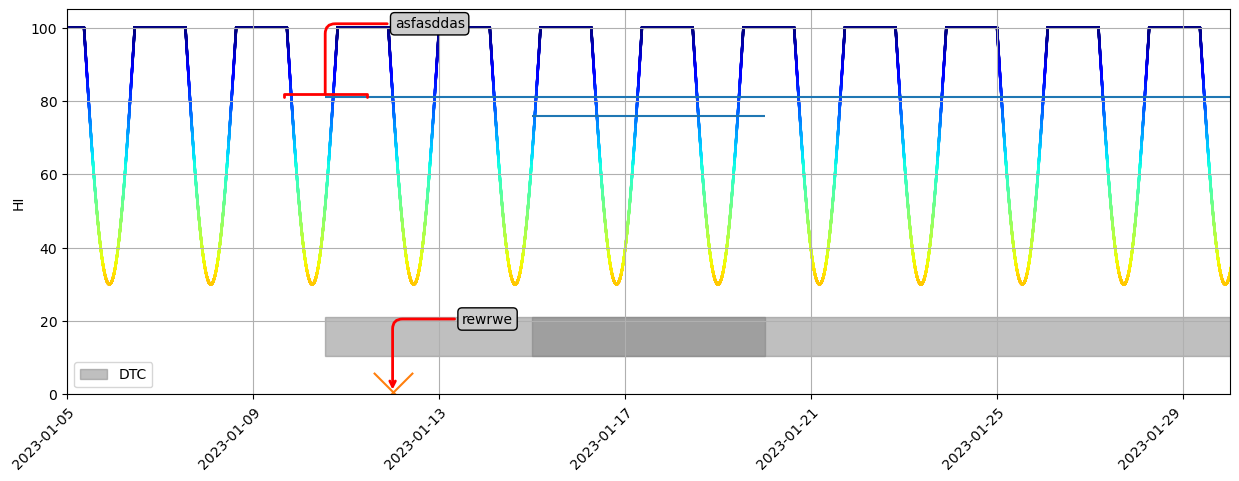

In [5]:
fig,ax=plottingFunctions.detail_HI_plot(data,datetime_intervals,interval_annotations=['','asfasddas'],start_date='2023-1-5',end_date='30-Jan-2023',events=[datetime(2023,1,12)],event_annotations=['rewrwe'])